# Finding Heavy Traffic Indicators on I-94 Highway

---

## 1. Introduction

We're going to analyze a [dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to **determine a few indicators of heavy traffic on I-94**. Examples of such indicators include weather type, time of the day or time of the week. 

---

## 2. Open and Read the Data

Let's start by opening and reading the dataset.

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


The dataset has 48204 rows and 9 columns with no null values. 

The data was collected from `2012-10-02` to `2018-09-30`, with each row indicating the traffic and weather data for a specific hour.

We can also find summarised information on each column in the dataset below.

In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are no null values in the entire dataset. 

The weather-related measurements are stored as numerical data, while other categorical columns are saved as text.

---

## 3. Analyzing the Data

**a. Overall Distribution of Traffic Volume Data**

We will first examine the distribution of the `traffic_volume` column and plot this on a histogram.

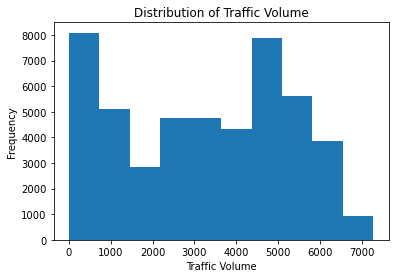

Traffic Volume Statistics
count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [3]:
import matplotlib.pyplot as plt

# Plot traffic_volume on histogram
traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.title('Distribution of Traffic Volume')
plt.show()

# Print traffic_volume statistics
print('Traffic Volume Statistics')
print(traffic['traffic_volume'].describe())

*The hourly traffic volume varies quite widely from a minimum of 0 to a maximum of 7280 cars passing the station*. 

There are two peaks at around 0 - 500 and 4500 - 5000 cars, which may correspond to off-peak hours at night and peak hours in the day respectively. We can compare day and night time data to confirm this theory.

**b. Compare day and night time traffic**

We'll start by dividing the dataset into two parts:

- Day time data: from 0700 to 1900
- Night time data:  from 1900 to 0700

In [4]:
# Transform from string to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# Separate the day and night time data
day = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)].copy()
night = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >= 19)].copy()

# Confirm the day and night time hours.
print('The day time data hours are:', day['date_time'].dt.hour.unique())
print('The night time data hours are:', night['date_time'].dt.hour.unique())

The day time data hours are: [ 9 10 11 12 13 14 15 16 17 18  8  7]
The night time data hours are: [19 20 21 22 23  0  1  2  3  4  5  6]


We will proceed to visualise the day and night traffic volumes side-by-side for comparison.

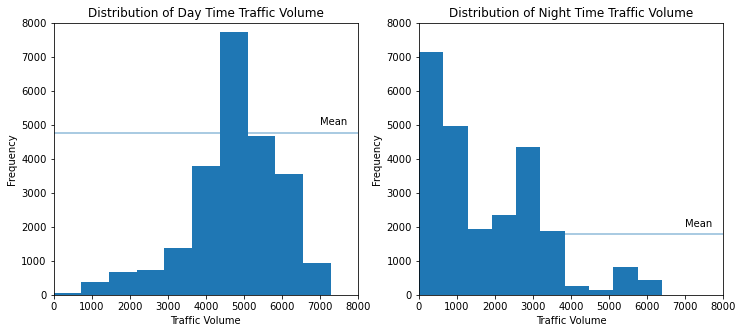

In [5]:
plt.figure(figsize = (12, 5))

# Plot the histogram of day traffic_volume 
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])

plt.title('Distribution of Day Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.xlim([0, 8000])
plt.ylim([0, 8000])

plt.axhline(day['traffic_volume'].mean(), alpha = 0.5)
plt.text(7000, 5000, 'Mean')
# Plot the histogram of night traffic_volume
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])

plt.title('Distribution of Night Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.xlim([0, 8000])
plt.ylim([0, 8000])

plt.axhline(night['traffic_volume'].mean(), alpha = 0.5)
plt.text(7000, 2000, 'Mean')

plt.show()

We observe that:
- The *day time* traffic volume data has a left skewed distribution with *higher traffic volumes* and a peak at 4500 - 5000 cars in an hour.
- The *night time* traffic volume data has a right skewed distribution with *lower traffic volumes* and a peak of 0 - 500 cars in an hour.

Since the mean night time traffic volume is much lower than the day time equivalent, we will *focus only on the day time data* to find indicators of heavy traffic.

**c. Time indicators**

A possible indicator of heavy traffic is time. We will explore the relation between traffic volume and these time parameters:
- Month 
- Day of week
- Time of day

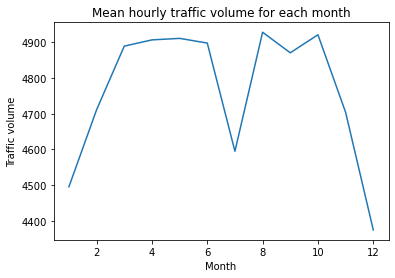

In [6]:
# Extract the month from date_time into a new column
day['month'] = day['date_time'].dt.month

# Plot the mean traffic volume in each month
by_month = day.groupby('month').mean()

by_month['traffic_volume'].plot.line()
plt.title('Mean hourly traffic volume for each month')

plt.xlabel('Month')
plt.ylabel('Traffic volume')

plt.show()

In general, the *traffic is heavier during warm months (March–October) than cold months (November–February)*.

Next, we will analyze how traffic volume changes on different days of the week.

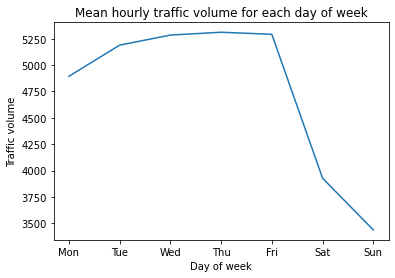

In [7]:
import numpy as np

# Extract the day of week from date_time into a new column
day['dayofweek'] = day['date_time'].dt.dayofweek

# Plot the mean traffic volume for each day in the week
by_dayofweek = day.groupby('dayofweek').mean() 

by_dayofweek['traffic_volume'].plot.line() 

plt.title('Mean hourly traffic volume for each day of week')
plt.xticks(ticks = np.arange(7), labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # 0 is Monday, 6 is Sunday

plt.xlabel('Day of week')
plt.ylabel('Traffic volume')

plt.show()

*Traffic volume is significantly heavier on weekdays (0 - 4) as compared to the weekend (0 - 5)*.

Since traffic volume differs between weekdays and weekends, we will split the day time data into 2 subsets and compare the trends side-by-side.

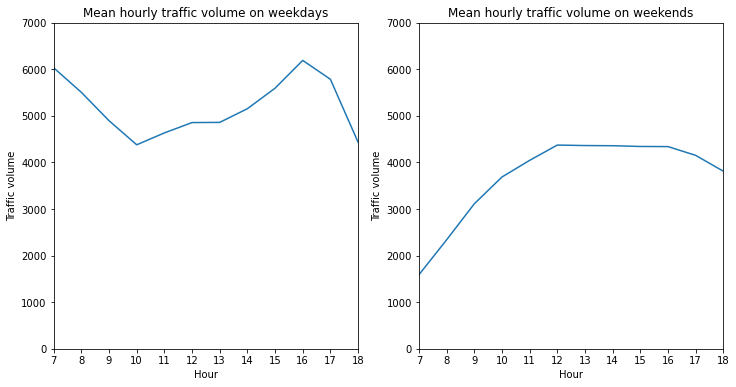

In [8]:
# Mean traffic volume for each hour on weekdays
day['hour'] = day['date_time'].dt.hour
weekdays = day[day['dayofweek'] <= 4] # 4 == Friday
by_hour_weekdays = weekdays.groupby('hour').mean()

# Mean traffic volume for each hour on weekends
weekends = day.copy()[day['dayofweek'] >= 5] #5 == Saturday
by_hour_weekends = weekends.groupby('hour').mean()

plt.figure(figsize = [12, 6])

# Weekdays plot
plt.subplot(1, 2, 1)
by_hour_weekdays['traffic_volume'].plot.line()

plt.title('Mean hourly traffic volume on weekdays')
plt.xlabel('Hour')
plt.ylabel('Traffic volume')

plt.xticks(ticks = [h for h in range(7, 19)])
plt.xlim(7, 18)
plt.ylim(0, 7000)

# Weekends plot
plt.subplot(1, 2, 2)
by_hour_weekends['traffic_volume'].plot.line()

plt.title('Mean hourly traffic volume on weekends')
plt.xlabel('Hour')
plt.ylabel('Traffic volume')

plt.xticks(ticks = [h for h in range(7, 19)])
plt.xlim(7, 18)
plt.ylim(0, 7000)

plt.show()

- *On weekdays, the peak hours are at 0700 and 1600*, which corresponds to before and after working hours.
- *On weekends, the highest traffic volumes are experienced between 1200 to 1600* in the afternoon.

**d. Weather indicators** 

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather:

| Column | Description |
| - | - |
| `temp` | Average temp in kelvin |
| `rain_1h` | Numeric Amount in mm of rain that occurred in the hour |
| `snow_1h` | Numeric Amount in mm of snow that occurred in the hour | 
| `clouds_all` | Numeric Percentage of cloud cover |
| `weather_main` | Categorical Short textual description of the current weather |
| `weather_description` | Categorical Longer textual description of the current weather |

Firstly, let's check the correlation values of the numerical weather indicators with traffic volume.

In [9]:
traffic.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


Since temperature has the strongest correlation with traffic volume, we will plot this on a scatter diagram.

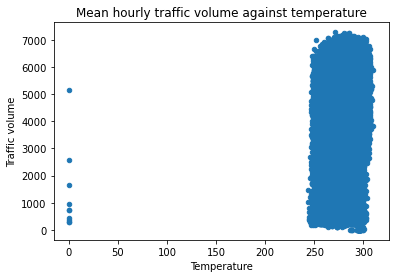

In [10]:
traffic.plot.scatter(x = 'temp', y = 'traffic_volume')

plt.title('Mean hourly traffic volume against temperature')
plt.xlabel('Temperature')
plt.ylabel('Traffic volume')
plt.show()

From the scatter plot, there is no observable trend between temperature and traffic volume.

Since the *numerical weather columns are not strong indicators of heavy traffic*, we will proceed to analyze the categorical weather parameters: `weather_main` and `weather_description`.

We will calculate the average traffic volume associated with each unique value in these two columns. 

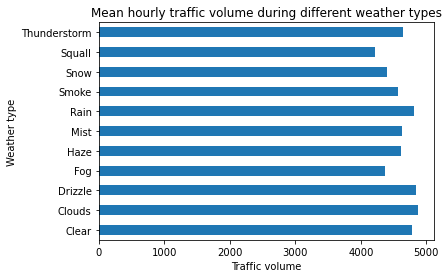

In [11]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()

plt.title('Mean hourly traffic volume during different weather types')
plt.xlabel('Traffic volume')
plt.ylabel('Weather type')

plt.show()

- The mean traffic volume is largely uniform across different weather types and does not exceed 5000 cars.
- *None of the weather types are a heavy traffic indicator*.

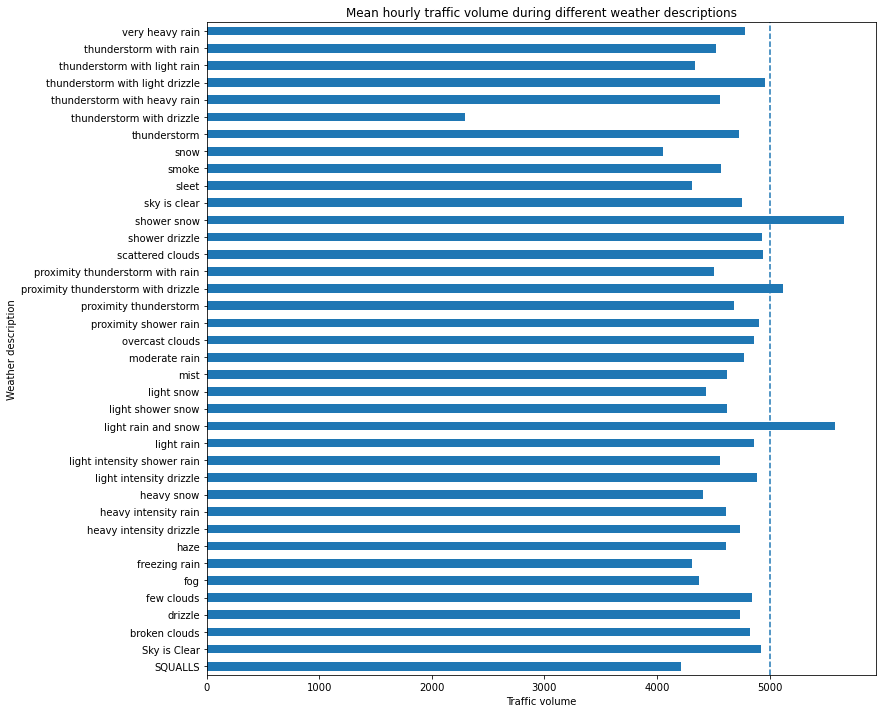

In [12]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize = [12, 12])

plt.title('Mean hourly traffic volume during different weather descriptions')
plt.xlabel('Traffic volume')
plt.ylabel('Weather description')

plt.axvline(5000, linestyle = '--')

plt.show()

The mean traffic volume exceeds 5000 cars for 3 weather descriptions: *shower snow, light rain and snow, promiximity thunderstorm with drizzle*. Hence, we can deduce that these are indicators of heavy traffic.

---

## 4. Conclusion

From the analysis, we have found the two types of indicators for heavy traffic on the I-94 highway.

- Time indicators
    - Month: Traffic is heavier during **warm months (March–October)** than cold months (November–February)
    - Day of week: Traffic is heavier during **weekdays** than weekends
    - Time of day: Peak hours are around **0700 and 1600 on weekdays**


- Weather indicators
    - **Shower snow**
    - **Light rain and snow**
    - **Proximity thunderstorm with drizzle**